In [18]:
from sim import TinderSimulation
import matplotlib.pyplot as plt
import numpy as np

# Run the base "tinder" simulation

The tinder simulation simulates the following in each time step:
* Males randomly choose up to 10 females they find attraction to. For each pairing, the male is added to the female's queue of choices.
* After the males make their selections, each female picks off the queue until they are mutually attracted to a male.
* The male and female are removed from the dating pool of the simulation.
* Repeat.

Attraction is randomly determined based on probability of attraction to their mate, which is a function of the mate's attractiveness. The attractiveness of each person is initialized at a value between 0 and 1.

## Simulation Parameters

In [10]:
TinderSimulation.default_params()

{'attractiveness_dist': functools.partial(<bound method Random.betavariate of <random.Random object at 0x7f825f87e218>>, alpha=4, beta=4),
 'curve_generator': <function curves.generators.attractiveness_dependent.<locals>.func(attractiveness)>,
 'curve_evolver': <function curves.evolvers.cycle_decreasing.<locals>.func(person, _sim)>}

The parameters are as follows:
* `attractiveness_dist`: distribution of attractiveness in the male/female population. This is by default a beta distribution that closely remembles a normal distribution.
* `curve_generator`: a function to generate a random "attraction curve", defined below.
* `curve_evolver`: a function to determine how the attraction curve evolves with the person and state of the simulation

An _attraction curve_ is a function that calculates the probability of attraction for a person to another person given that other person's attraction. By default `curve_generator` is set to an attraction curve where the probability of attraction is near zero if the other person's attractiveness is close to 0, and the increases towards 1 in a sigmoidal fashion, where the probability of attraction is near one if the other person's attraction is close to 1. How quickly it increases to 1 is something we will parameterize as follows:

The sigmoid curve used here is the [Incomplete Beta Function](https://mathworld.wolfram.com/IncompleteBetaFunction.html) with a width parameter set to 4 (`a` and `b` parameters of the function to set 4). By default, the `curve_generator`, 1) calculates an attractive curve based on the person's attractiveness. An attractive person will tend to have higher standards, and these higher standards are incorporated into an adjustment of the `a` and `b` parameters. 2) additionally move the `a` and `b` parameters in a manner distributed normally, to artificially introduce noise to the distribution of attraction curves.

As time progresses, the people who remain single will start lowering their standards. By default, at each time step the `curve_evolver` will slowly reduce the standards of each person by adjust each person's `a` and `b` parameters of their attraction curve.

Each of `attractiveness_dist`, `curve_generator`, and `curve_evolver` can be set separately for each sex. (See below.)

## Set number of males, females, and steps, and run the simulation.
### * It is recommended to use n_males, n_females >> steps. Number of males can be same or different from the number of females.

In [12]:
n_males = 1100
n_females = 1000
steps = 30

If you want to set a different `attractiveness_dist`, `curve_generator`, or `curve_evolver`, you can provider overrides to default behavior for each of males and females, for example:
```
another_sim = TinderSimulation(n_males, n_females, 
   male_params=dict(curve_generator=<func>), 
   female_params=dict(attractiveness_dist=<whatever>, curve_evolver=<func>)
)
```

In [13]:
basic_sim = TinderSimulation(n_males=n_males, n_females=n_females)

In [14]:
basic_sim.run(steps)

# Results

## Do people of similar attractiveness tend to find each other?

The answer seems to be yes. See the plot of matches below.

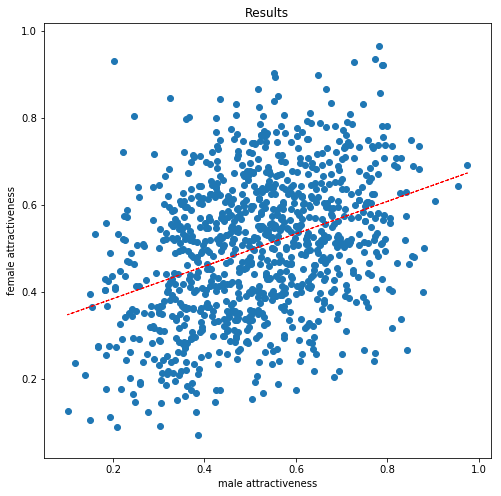

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

matches = basic_sim.matches
x = [match.male.attractiveness for match in matches]
y = [match.female.attractiveness for match in matches]
plt.scatter(x, y)
plt.xlabel('male attractiveness')
plt.ylabel('female attractiveness')
plt.title('Results')

# draw trend line
z = np.polyfit(x, y, 1)
trend = np.poly1d(z)(x)
plt.plot(x, trend, "r--", lw=1)

## What about the single people?

We can check the leftover `male_pool` and `female_pool` within our simulation and look at the characteristics.

Text(0, 0.5, 'pickiness')

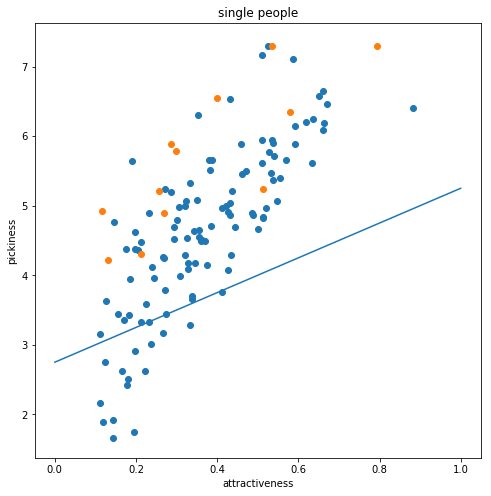

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
plt.scatter([p.attractiveness for p in basic_sim.male_pool], [p.attraction_curve.params['a'] for p in basic_sim.male_pool])
plt.scatter([p.attractiveness for p in basic_sim.female_pool], [p.attraction_curve.params['a'] for p in basic_sim.female_pool])
x0 = np.linspace(0, 1)
plt.plot(x0, (1.25/0.5)*x0 + 2.75)

plt.title('single people')
plt.xlabel('attractiveness')
plt.ylabel('pickiness')

The blue line up above is the level of pickiness we would "expect" for our default attraction curve generator, before adding in random variation to individuals' attraction curves. The pickiness is parameterized by the `a` parameter in the attraction curve. Generally, the single people left are a) less attractive than average, or b) more picky/have higher standards than average. This is what we would expect.